## 3.1 - Polynomial fits

In [ ]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
plt.scatter(x,y)
plt.show()

In [ ]:
z = np.polyfit(x, y, 3)
print z

In [ ]:
z = np.polyfit(x, y, 3)
p3 = np.poly1d(z)

In [ ]:
z = np.polyfit(x, y, 30)
p30 = np.poly1d(z)

In [ ]:
xp = np.linspace(-0,5.5,100)
plt.scatter(x,y)
plt.plot(xp, p3(xp), color='green')
plt.plot(xp, p30(xp), color='red', ls='--')
plt.show()

In [ ]:
plt.scatter(x,y,label='Original data')
plt.plot(xp, p3(xp), color='green',label='3rd degree')
plt.plot(xp, p30(xp), color='red', ls='--', label='30th degree')
plt.ylim([-2,2])
plt.legend()
plt.show()

## 3.2 - Generic curve fitting

$$\Large{f(x) = a e^{-bx} + c}$$

In [ ]:
def f(x, a, b, c):
    return a*np.exp(-b*x)+c

In [ ]:
from scipy.optimize import *

In [ ]:
x = np.linspace(0, 5, 50)
a = 5.0
b = 2.0
c = 0.5
arr = (a,b,c)

In [ ]:
plt.scatter(x, f(x, *arr))
plt.show()

In [ ]:
#Add some random noise
y_noise = f(x, *arr) + 0.3*np.random.normal(size=len(x))

In [ ]:
plt.scatter(x, y_noise)
plt.show()

Use non-linear least squares to fit a function, f, to data.

In [ ]:
guess = [3.0, 1.0, 1.0]
popt, pcov = curve_fit(f, x, y_noise, p0=guess)
#The optimised parameters of the fit
print "popt:", popt
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print "perr:", perr
#The covariance matrix of the parameters
print "pcov:", pcov

In [ ]:
#Calculate R squared
residuals = y_noise - f(x, *popt)
plt.plot(x, residuals)
plt.show()

In [ ]:
#Sum of the residuals squared
ss_res = np.sum(residuals**2)
#Total sum of squares
ss_tot = np.sum((y_noise-np.mean(y_noise))**2)
#R-Squared
Rsq = 1.0 - ss_res/ss_tot

In [ ]:
plt.scatter(x, y_noise)
strlabel = r'$R^2 = %0.3f$' % Rsq
plt.plot(x, f(x, *popt), color='red', label=strlabel)
plt.legend()
plt.show()

Sometimes you need to get constraints to test your physics model... and you need to be careful doing so!

In [ ]:
popt2, pcov2 = curve_fit(f, x, y_noise, p0=guess, bounds=([1.0, 0.0, 0.0], [3., 1., 2.]))
#The optimised parameters of the fit
print "popt2:", popt2
#One standard deviation errors on the parameters.
perr2 = np.sqrt(np.diag(pcov2))
print "perr2:", perr
#The covar2iance matrix of the parameters
print "pcov2:", pcov2

In [ ]:
plt.scatter(x, y_noise, label='Orginal')
plt.plot(x, f(x, *popt), color='red', label='Unconstrained')
plt.plot(x, f(x, *popt2), color='green', label='Constrained')
plt.legend()
plt.show()

## 3.3 - Gaussian fit

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *

In [14]:
# Let's create the Gaussian function
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [15]:
#Lets get unperturbed data
# Generating clean data
x = np.linspace(-5, 15, 200)
y = gauss(x, 1, 5, 2)

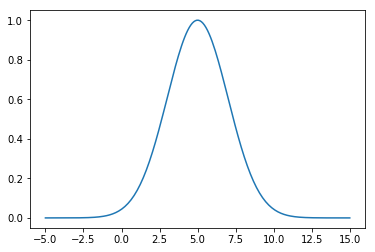

In [16]:
plt.plot(x,y)
plt.show()

In [17]:
yn = y + 0.1 * np.random.normal(size=len(x))

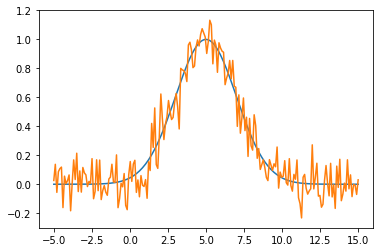

In [18]:
plt.plot(x,y)
plt.plot(x,yn)
plt.show()

In [26]:
popt, pcov = curve_fit(gauss, x, yn, p0=[5.0, 5.0, 1.0])
#The optimised parameters of the fit
print(popt)
#One standard deviation errors on the parameters.
#perr = np.sqrt(np.diag(pcov))
#print "perr:", perr
#The covariance matrix of the parameters
#print "pcov:", pcov

[ 1.00882715  5.0269462   1.96117371]


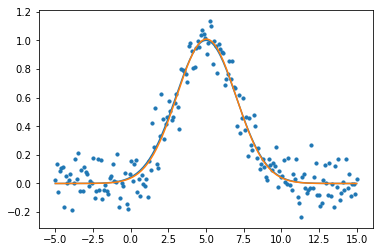

In [27]:
plt.plot(x, y, label='Original')
plt.scatter(x, yn, label='Noise',s=10)
plt.plot(x, gauss(x, *popt), label='Fit')
plt.show()

## 3.4 - Extra - Voigt fit

For the Spectroscopy collegues:
```bash
pip install lmfit
```

In [28]:
import numpy as np
import matplotlib.pyplot as plt
s = np.loadtxt('./Files/line.txt')
l = np.arange(len(s))

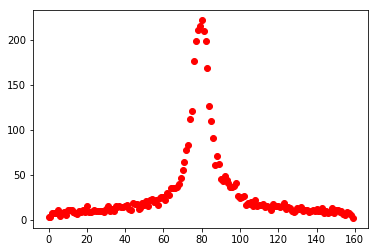

In [29]:
plt.plot(l, s, marker='o', ls='', color='r')
plt.show()

In [30]:
from lmfit.models import PseudoVoigtModel

[[Model]]
    Model(pvoigt)
[[Fit Statistics]]
    # function evals   = 76
    # data points      = 160
    # variables        = 4
    chi-square         = 10762.373
    reduced chi-square = 68.990
    Akaike info crit   = 681.382
    Bayesian info crit = 693.683
[[Variables]]
    amplitude:   4405.17037 +/- 83.84218 (1.90%) (init= 4110.24)
    sigma:       5.63702545 +/- 0.236113 (4.19%) (init= 5)
    center:      79.5249310 +/- 0.103165 (0.13%) (init= 79)
    fraction:    1.21228736 +/- 0.052351 (4.32%) (init= 0.5)
    fwhm:        11.2740509 +/- 0.472227 (4.19%)  == '2.0000000*sigma'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, fraction)           = -0.774 
    C(amplitude, fraction)       =  0.314 



(<matplotlib.figure.Figure at 0x7fa630fb7f50>,
 <matplotlib.gridspec.GridSpec at 0x7fa630fd9210>)

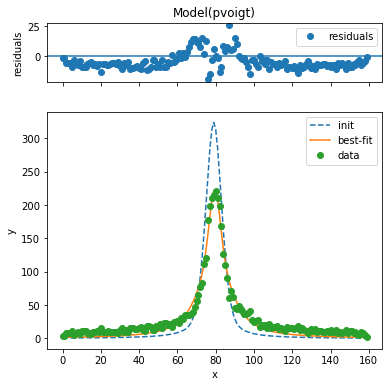

In [31]:
%matplotlib inline
mod = PseudoVoigtModel()
pars = mod.guess(s, x=l)
out = mod.fit(s, pars, x=l)
print(out.fit_report(min_correl=0.25))
out.plot()